## Observations and Insights 

In [2]:
#use majic function


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset - merge on mouse ID with outer join
combined_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID',how='outer')
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
row_count = len(combined_df['Mouse ID'])
row_count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find duplicate mouse iD - 989 duplicate mouse + timepoint lines
duplicate_mouse_ids=combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop the duplicates - total = 1800
clean_mouse_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
row_count = len(clean_mouse_df['Mouse ID'])
row_count

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#create one group by variable to be more efficient 
drug_regimen = clean_mouse_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen.mean()['Tumor Volume (mm3)']
median = drug_regimen.median()['Tumor Volume (mm3)']
variance = drug_regimen.var()['Tumor Volume (mm3)']
std = drug_regimen.std()['Tumor Volume (mm3)']
sem = drug_regimen.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({'Mean':mean,
                         'Median':median,
                         'Variance':variance,
                         'Standard Deviation':std,
                         'SEM':sem
                        })
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary =drug_regimen.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
#create data set for charting - unique mice tested on  
chat_data = clean_mouse_df.groupby('Drug Regimen')['Mouse ID'].nunique()
chat_data

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

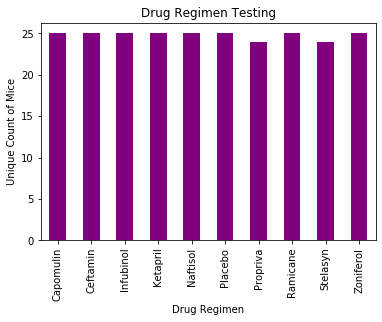

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
chat_data.plot(kind='bar', facecolor="purple")

#label charts
plt.title("Drug Regimen Testing")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Count of Mice")

plt.show()
plt.tight_layout()
plt.savefig('barchart_one')

In [12]:
import numpy as np

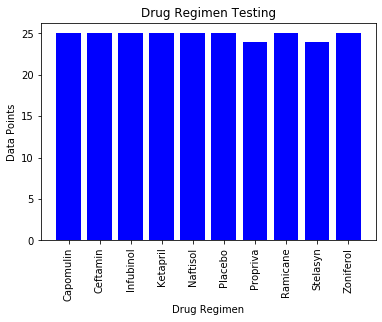

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Create an arraw with the datapoints
users = [25 ,25, 25, 25, 25, 25, 24, 25, 24, 25]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(chat_data))

plt.bar(x_axis, users, color='b', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane', 'Stelasyn','Zoniferol'],  rotation='vertical')

plt.title("Drug Regimen Testing")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.savefig('barchart_two')

In [29]:

#groupby gender using mouse ID
groupby_gender = clean_mouse_df.groupby(["Sex"]).nunique()["Mouse ID"]
#create gender for labels
gender_index =list(groupby_gender.index)
groupby_gender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

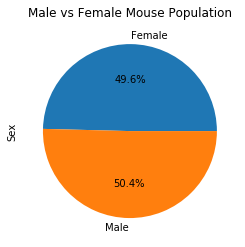

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender.plot(kind='pie',autopct="%1.1f%%")
plt.legend
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()
plt.savefig('pie_one')

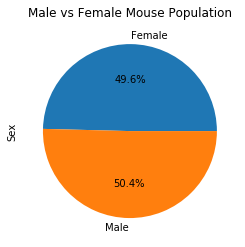

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(groupby_gender,labels=gender_index, autopct="%1.1f%%")
plt.legend
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()
plt.savefig('pie_two')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
